# Census Income Project
## Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

#### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls.

##### These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

To download the dataset, use the link given below. 
##### Downlaod Files:
•	https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

These option will hepl to view all the rows and columns

In [3]:
df = pd.read_csv(r"C:\Users\dell\Desktop\Data Trained Projects\Project 5\census_income.csv")
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


The dataset is load succesfully

In [4]:
df.shape

(32560, 15)

The shape of the data is 32560 rows and 15 columns

#### Check the concise summary of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are two different datatypes of the features:
1. int64 - total 6 features
2. object - total 9 features

#### Check the statistical summary of the dataframe

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


#### Check for null values

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values found in the dataset

#### Check for uniquiness in feature columns

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

## Explotary Data Analysis (EDA)

In [9]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Workclass has total 9 different class and have the given values

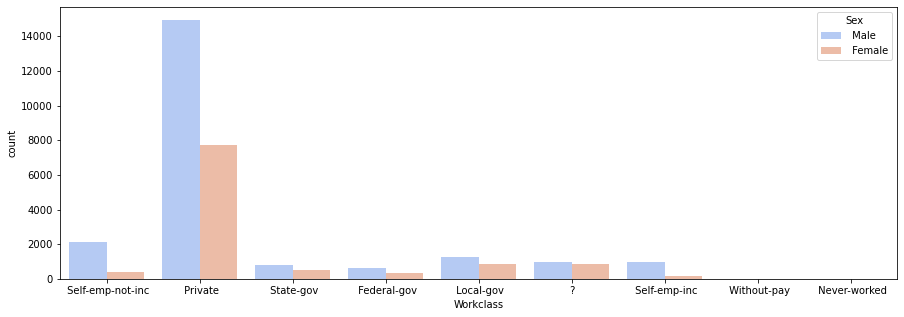

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(df['Workclass'], palette='coolwarm', hue='Sex', data=df)
plt.show()

In this above graph, we can observe that there are more number of males then female

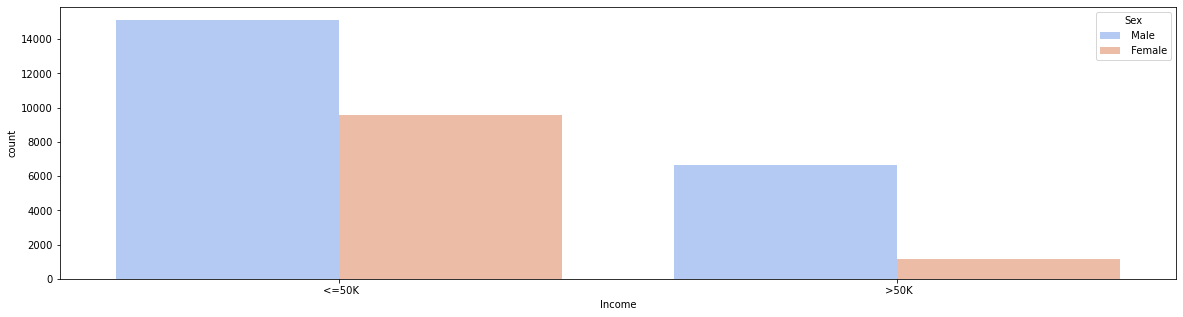

In [11]:
plt.figure(figsize=(20,5))
sns.countplot(df['Income'], palette='coolwarm', hue='Sex', data=df, )
plt.show()

In both the cases, income of males are greater than females

In [12]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Above we can see the classes, the occupations have

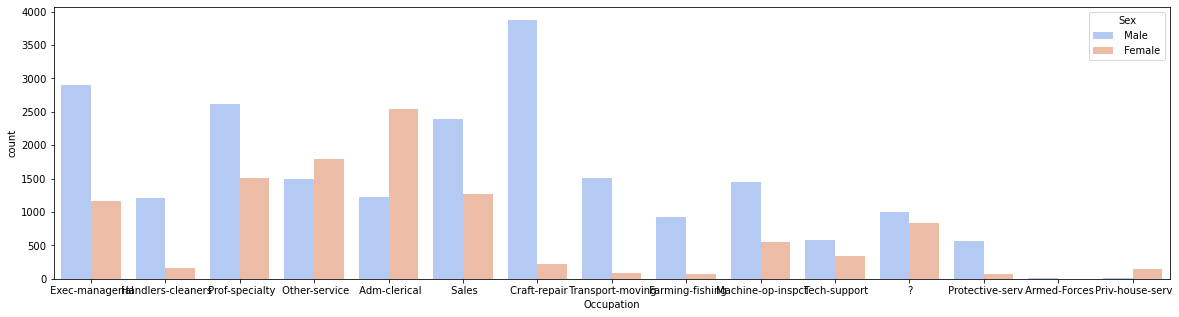

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(df['Occupation'], palette='coolwarm', hue='Sex', data=df, )
plt.show()

Here, we can observe that males are more occupied in in all the class of the occupation

In [14]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

We can observe that maximum people's native country is United states, and one one person is from Holand

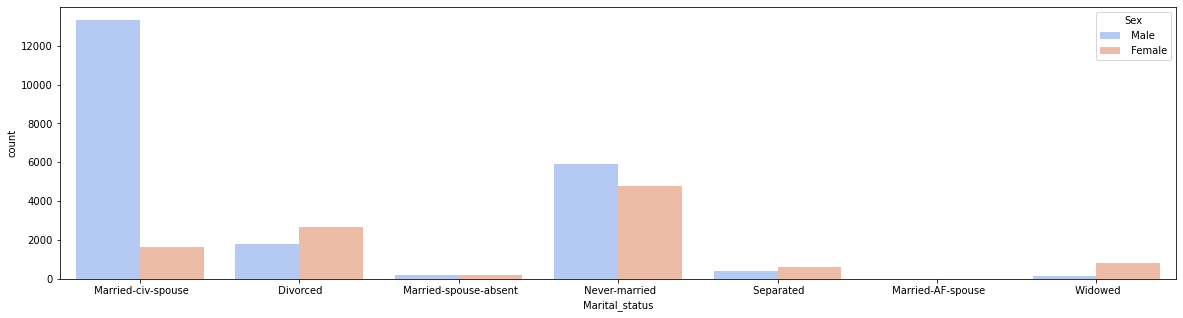

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(df['Marital_status'], palette='coolwarm', hue='Sex', data=df)
plt.show()

This graps shows the count of all classes of Maritial status with respect to their sex.

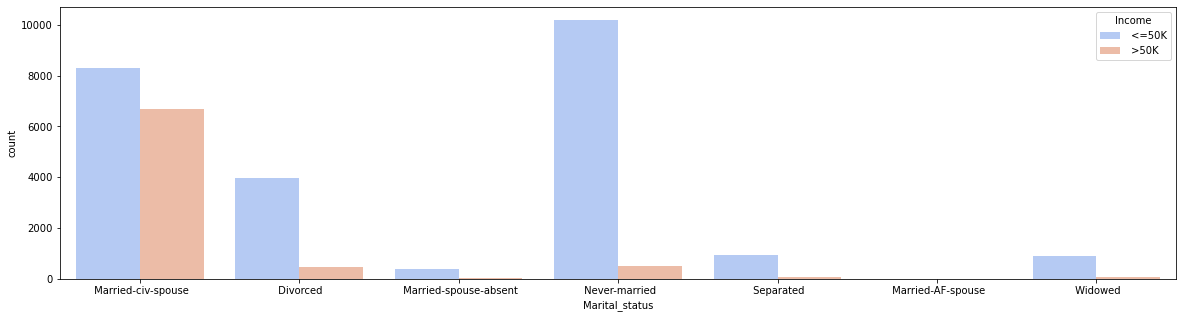

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(df['Marital_status'], palette='coolwarm', hue='Income', data=df)
plt.show()

This graps shows the count of all classes of Maritial status with respect to their Income.

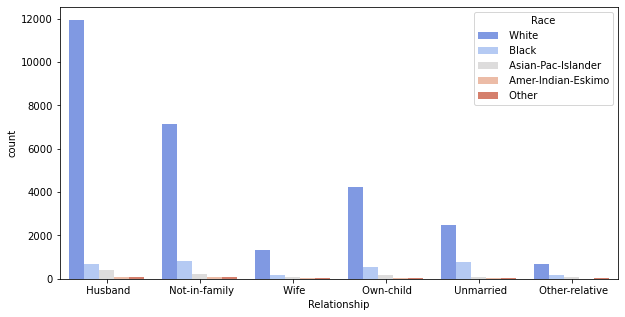

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(df['Relationship'], palette='coolwarm', hue='Race', data=df)
plt.show()

This plot shows the number of classes and the number of peoples with respect of their race

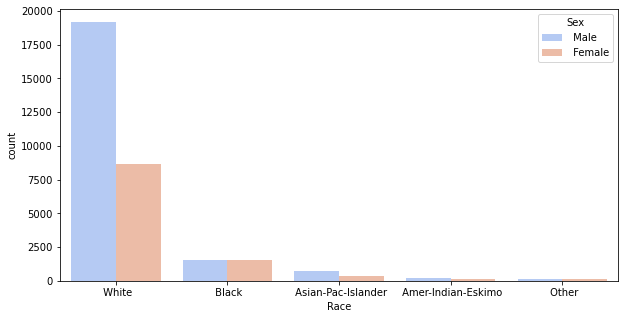

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df['Race'], palette='coolwarm', hue='Sex', data=df)
plt.show()

This graph shows the count of different classes of race with respect to their gender.

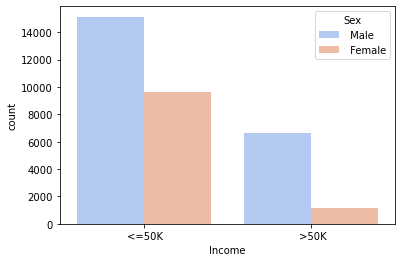

In [19]:
sns.countplot(df['Income'], palette='coolwarm', hue='Sex', data=df)
plt.show()

The graph shows the income with respect to their sex, where the number of males more in both the cases.

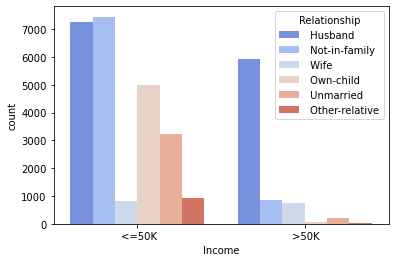

In [20]:
sns.countplot(df['Income'], palette='coolwarm', hue='Relationship', data=df)
plt.show()

The graph shows the income with respect to their relationship.

## Filling ? Values

Replacing the unknowns with the column's mean.

In [21]:
df['Workclass'] = df['Workclass'].replace(' ?', 'Private')
df['Occupation'] = df['Occupation'].replace(' ?', 'Prof-specialty')
df['Native_country'] = df['Native_country'].replace(' ?', 'United-States')

In [22]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [23]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [24]:
df['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

Both Education and Education_number shows the same thing or are same.

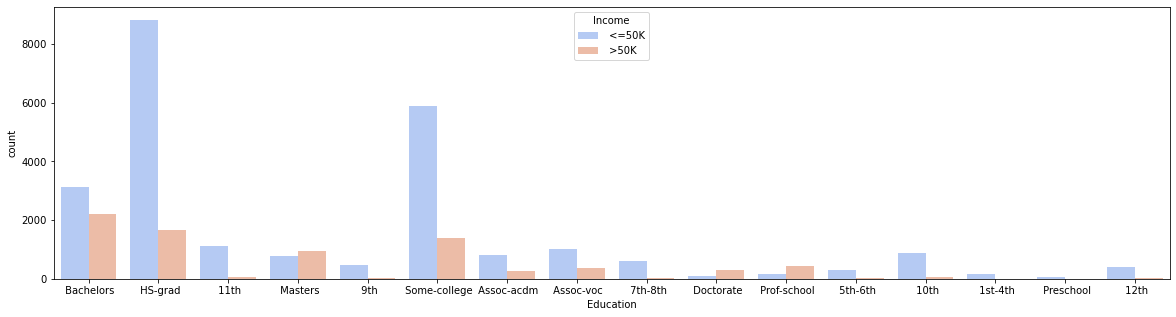

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(df['Education'], palette='coolwarm', hue='Income', data=df)
plt.show()

The graph shows the income with respect to their Education.

## Feature Engineering

Replace the Income classes into numeric 0 and 1

In [26]:
# income
df.Income = df.Income.replace(' <=50K', 0)
df.Income = df.Income.replace(' >50K', 1)

Grouing and mearging the classes of Maritial Status for decreasing the number of columns

In [27]:
#martial status
df['Marital_status']= df['Marital_status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'married')
df['Marital_status']= df['Marital_status'].replace([' Never-married'], 'not-married')
df['Marital_status']= df['Marital_status'].replace([' Divorced', ' Separated', ' Widowed', ' Married-spouse-absent'], 'other')

Grouing and mearging the classes of Education for decreasing the number of columns and for better understanding

In [28]:
# education Category
df.Education= df.Education.replace([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th'], 'school')
df.Education = df.Education.replace(' HS-grad', 'high school')
df.Education = df.Education.replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school', ' Some-college'], 'higher')
df.Education = df.Education.replace(' Bachelors', 'undergrad')
df.Education = df.Education.replace(' Masters', 'grad')
df.Education = df.Education.replace(' Doctorate', 'doc')

In [29]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,undergrad,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,high school,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,undergrad,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,grad,14,married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


Grouping and mearging done succesfully

In [30]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

* 0 = Less then or equalto 50k
* 1 = More than 50k

In [31]:
df['Marital_status'].value_counts()

married        14999
not-married    10682
other           6879
Name: Marital_status, dtype: int64

Divided the maritial status into three classes above and and here is their count

In [32]:
df['Education'].value_counts()

high school    10501
higher         10316
undergrad       5354
school          4253
grad            1723
doc              413
Name: Education, dtype: int64

Divided the Education into six classes above and and here is their count

#### Check the correlation of the dataset

In [33]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


#### Ploting a heatmat to understand the correlation better

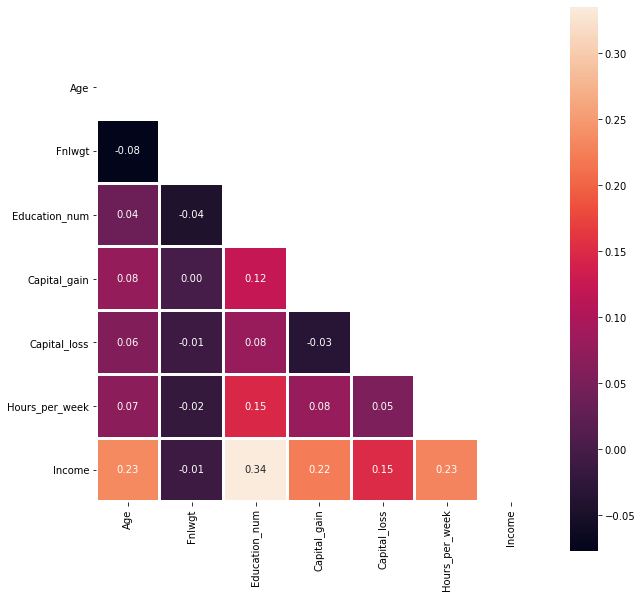

In [34]:
plt.figure(figsize=(10,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidths=2, square= True, fmt='.2f', mask=matrix)
plt.show()

We can observe that Education_num is havng the maximum correlation with income followed by Age and hours_per_week.

#### Check for outliers and also ploting hist graph of the dataset

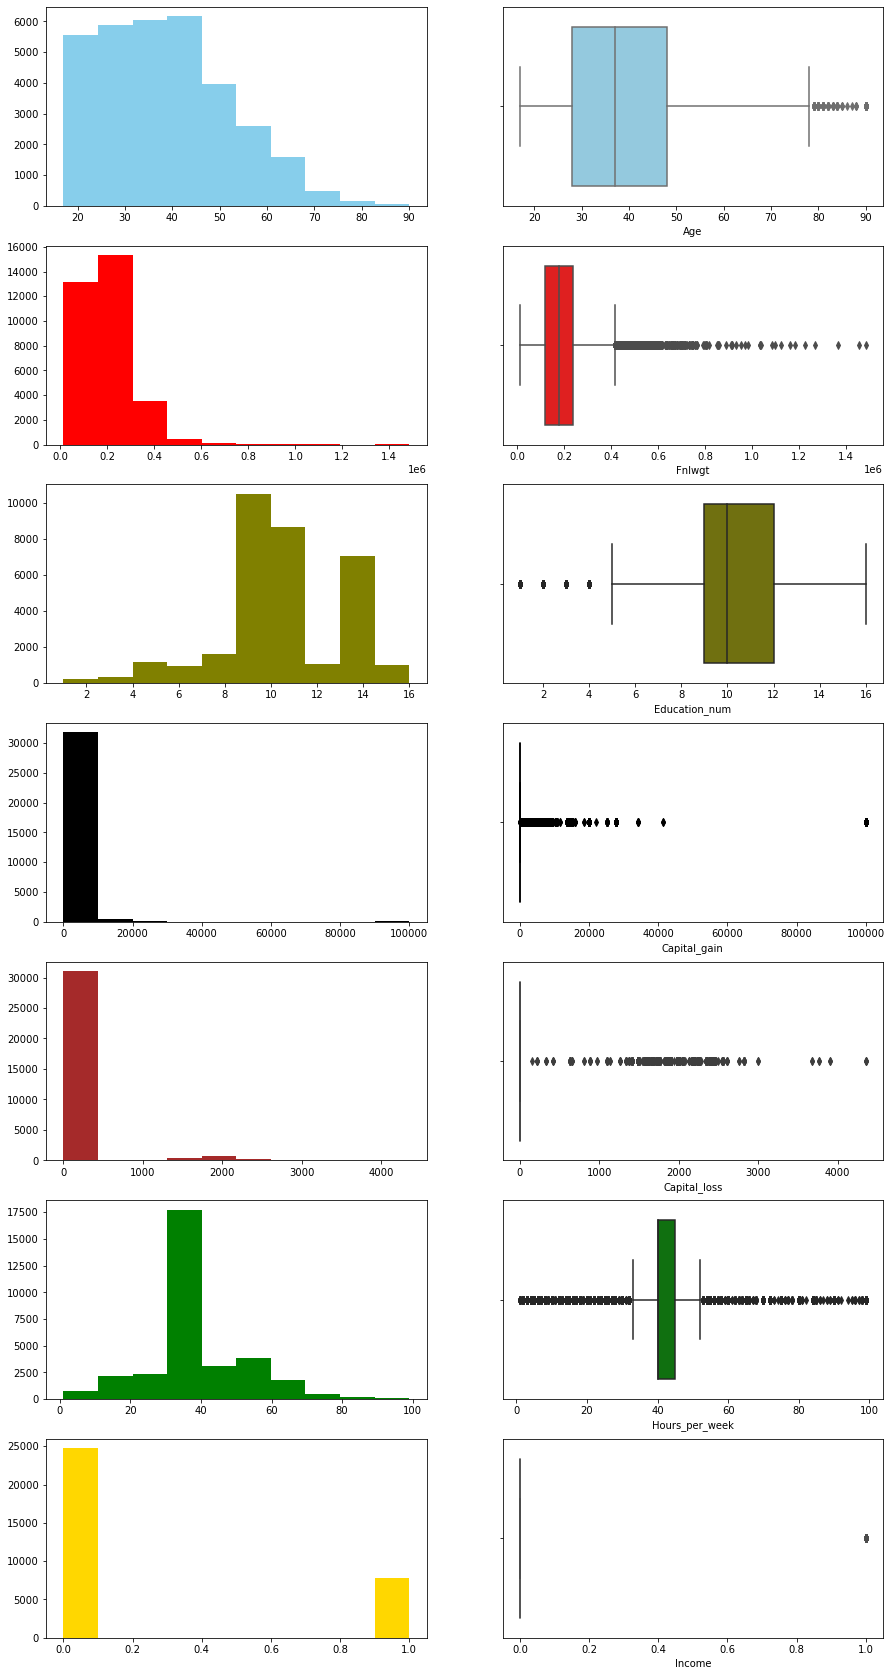

In [35]:
plt.figure(figsize=(15,30))
plt.subplot(7,2,1)
plt.hist(x=df.Age, color='skyblue', histtype='stepfilled')
plt.subplot(7,2,2)
sns.boxplot(df.Age, color='skyblue')

plt.subplot(7,2,3)
plt.hist(x=df.Fnlwgt, color='red', histtype='bar')
plt.subplot(7,2,4)
sns.boxplot(df.Fnlwgt, color='red')

plt.subplot(7,2,5)
plt.hist(x=df.Education_num, color='olive', histtype='barstacked')
plt.subplot(7,2,6)
sns.boxplot(df.Education_num, color='olive')

plt.subplot(7,2,7)
plt.hist(x=df.Capital_gain, color='black', histtype='bar')
plt.subplot(7,2,8)
sns.boxplot(df.Capital_gain, color='black')

plt.subplot(7,2,9)
plt.hist(x=df.Capital_loss, color='brown', histtype='bar')
plt.subplot(7,2,10)
sns.boxplot(df.Capital_loss, color='brown')

plt.subplot(7,2,11)
plt.hist(x=df.Hours_per_week, color='green', histtype='bar')
plt.subplot(7,2,12)
sns.boxplot(df.Hours_per_week, color='green')

plt.subplot(7,2,13)
plt.hist(x=df.Income, color='gold', histtype='bar')
plt.subplot(7,2,14)
sns.boxplot(df.Income, color='gold')

plt.show()

Here, in the above plotting, we found that the features are not balanced and also have outliers, which we will standardize later before training the model

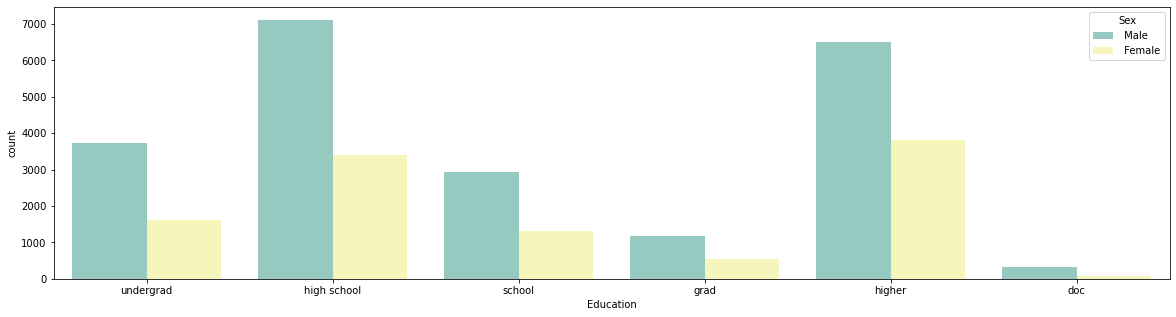

In [36]:
plt.figure(figsize=(20,5))
sns.countplot(df['Education'], palette='Set3', hue='Sex', data=df)
plt.show()

The graph shows the educations of the gender with their count

## Model Building

In [37]:
X= df.drop(['Income'], axis=1)
y = df['Income']

Above, we drop the Income label from the dataset and store it at y-variable

## Feature Scaling

In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [39]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,5,12,0,3,0,4,1,0,0,12,38,0
1,21,3,14085,2,8,2,5,1,4,1,0,0,39,38,0
2,36,3,15335,4,6,0,5,0,2,1,0,0,39,38,0
3,11,3,19354,5,12,0,9,5,2,0,0,0,39,4,0
4,20,3,17699,1,13,0,3,5,4,0,0,0,39,38,0


In [40]:
scaler= StandardScaler().fit(df1.drop('Income', axis=1))

In [41]:
X= scaler.transform(df1.drop('Income', axis=1))
y= df['Income']

Here, we have standardize the dataset and encoded to a numerical values

## Train test split

Split the data into fore parts

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [43]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24420, 14), (24420,), (8140, 14), (8140,))

## Modeling

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score

##### As it is a classification problem, I will use four ML Algorithms:
1. Logistic Regression
2. Naive Bayes
3. Decision Tree 
4. Random forest

##### Also we will also do:
* The cross validation of each of the Machine learning algorithms
* See the confusion matrix of all the Machine learning algorithms 
* Have a classification reports of all Machine learning algorithms
* Find out the AUC-ROC score and plot ROC Curve of all Machine learning algorithms

##### Finally:
- Save the model which will have the best accuracy score.

### Logistic Regression

In [45]:
lr = LogisticRegression()
model1 = lr.fit(X_train, y_train)
predict1 = model1.predict(X_test)

print("Train Score:", lr.score(X_train, y_train))
print("Test Score:", lr.score(X_test, y_test))

Train Score: 0.8361179361179362
Test Score: 0.8444717444717444


In [46]:
print(confusion_matrix(y_test, predict1))

[[5819  403]
 [ 863 1055]]


In [47]:
print(classification_report(y_test, predict1))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6222
           1       0.72      0.55      0.63      1918

    accuracy                           0.84      8140
   macro avg       0.80      0.74      0.76      8140
weighted avg       0.84      0.84      0.84      8140



#### Cross Validation for Logistic Regression

In [48]:
lrc=accuracy_score(y_test,predict1)
for j in range(2,10):
    lrscore=cross_val_score(lr,X,y,cv=j)
    lsc=lrscore.mean()
    print('At cv:-', j)
    print('Cross validation score is:-',lsc*100)
    print('Accuracy_score is:-',lrc*100)
    print('\n')

At cv:- 2
Cross validation score is:- 83.78685503685503
Accuracy_score is:- 84.44717444717445


At cv:- 3
Cross validation score is:- 83.8237203244074
Accuracy_score is:- 84.44717444717445


At cv:- 4
Cross validation score is:- 83.77149877149877
Accuracy_score is:- 84.44717444717445


At cv:- 5
Cross validation score is:- 83.84213759213759
Accuracy_score is:- 84.44717444717445


At cv:- 6
Cross validation score is:- 83.78380233909382
Accuracy_score is:- 84.44717444717445


At cv:- 7
Cross validation score is:- 83.75310728923048
Accuracy_score is:- 84.44717444717445


At cv:- 8
Cross validation score is:- 83.78378378378379
Accuracy_score is:- 84.44717444717445


At cv:- 9
Cross validation score is:- 83.77458084810183
Accuracy_score is:- 84.44717444717445




In [49]:
lrscore_selected = cross_val_score(lr,X,y,cv=5).mean()
print("The cv score is:-", lrscore_selected,'\nThe accuracy score is:-',lrc)

The cv score is:- 0.8384213759213759 
The accuracy score is:- 0.8444717444717444


#### ROC AUC curve for Logistic Regression

In [50]:
lr_roc=roc_auc_score(y_test, predict1)
lr_roc

0.7426409836400756

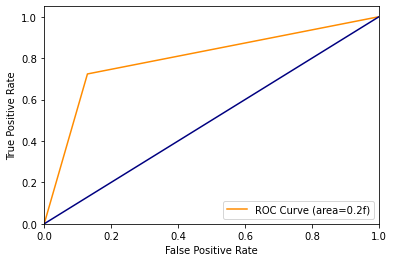

In [51]:
fpr, tpr, thresholds = roc_curve(predict1, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange', label='ROC Curve (area=0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Naive Bayes

In [52]:
gnb = GaussianNB()
model2 = gnb.fit(X_train, y_train)
predict2 = model2.predict(X_test)

print("Train Score:", gnb.score(X_train, y_train))
print("Test Score:", gnb.score(X_test, y_test))

Train Score: 0.8233415233415233
Test Score: 0.8254299754299754


In [53]:
print(confusion_matrix(y_test, predict2))

[[5747  475]
 [ 946  972]]


In [54]:
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6222
           1       0.67      0.51      0.58      1918

    accuracy                           0.83      8140
   macro avg       0.77      0.72      0.73      8140
weighted avg       0.81      0.83      0.82      8140



#### Cross Validation for Naive Bayes

In [55]:
nbc=accuracy_score(y_test,predict1)
for j in range(2,10):
    nbscore=cross_val_score(lr,X,y,cv=j)
    nb=nbscore.mean()
    print('At cv:-', j)
    print('Cross validation score is:-',nb*100)
    print('Accuracy_score is:-',nbc*100)
    print('\n')

At cv:- 2
Cross validation score is:- 83.78685503685503
Accuracy_score is:- 84.44717444717445


At cv:- 3
Cross validation score is:- 83.8237203244074
Accuracy_score is:- 84.44717444717445


At cv:- 4
Cross validation score is:- 83.77149877149877
Accuracy_score is:- 84.44717444717445


At cv:- 5
Cross validation score is:- 83.84213759213759
Accuracy_score is:- 84.44717444717445


At cv:- 6
Cross validation score is:- 83.78380233909382
Accuracy_score is:- 84.44717444717445


At cv:- 7
Cross validation score is:- 83.75310728923048
Accuracy_score is:- 84.44717444717445


At cv:- 8
Cross validation score is:- 83.78378378378379
Accuracy_score is:- 84.44717444717445


At cv:- 9
Cross validation score is:- 83.77458084810183
Accuracy_score is:- 84.44717444717445




In [56]:
nbscore_selected = cross_val_score(lr,X,y,cv=5).mean()
print("The cv score is:-", nbscore_selected,'\nThe accuracy score is:-',nbc)

The cv score is:- 0.8384213759213759 
The accuracy score is:- 0.8444717444717444


#### ROC AUC curve for Naive Bayes

In [57]:
nb_roc=roc_auc_score(y_test, predict2)
nb_roc

0.7152179407122429

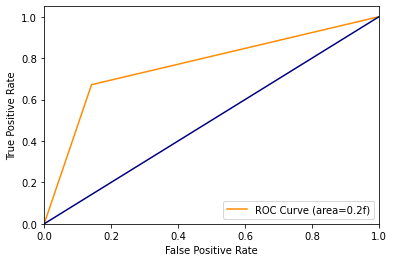

In [58]:
fpr, tpr, thresholds = roc_curve(predict2, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange', label='ROC Curve (area=0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Decision Tree

In [59]:
dtc = DecisionTreeClassifier()
model3 = dtc.fit(X_train, y_train)
predict3 = model3.predict(X_test)

print("Train Score:", dtc.score(X_train, y_train))
print("Test Score:", dtc.score(X_test, y_test))

Train Score: 0.9999590499590499
Test Score: 0.8187960687960688


In [60]:
print(confusion_matrix(y_test, predict3))

[[5433  789]
 [ 686 1232]]


In [61]:
print(classification_report(y_test, predict3))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6222
           1       0.61      0.64      0.63      1918

    accuracy                           0.82      8140
   macro avg       0.75      0.76      0.75      8140
weighted avg       0.82      0.82      0.82      8140



#### Cross Validation for Decision Tree

In [62]:
dtcc=accuracy_score(y_test,predict1)
for j in range(2,10):
    dtscore=cross_val_score(lr,X,y,cv=j)
    dt=dtscore.mean()
    print('At cv:-', j)
    print('Cross validation score is:-',dt*100)
    print('Accuracy_score is:-',dtcc*100)
    print('\n')

At cv:- 2
Cross validation score is:- 83.78685503685503
Accuracy_score is:- 84.44717444717445


At cv:- 3
Cross validation score is:- 83.8237203244074
Accuracy_score is:- 84.44717444717445


At cv:- 4
Cross validation score is:- 83.77149877149877
Accuracy_score is:- 84.44717444717445


At cv:- 5
Cross validation score is:- 83.84213759213759
Accuracy_score is:- 84.44717444717445


At cv:- 6
Cross validation score is:- 83.78380233909382
Accuracy_score is:- 84.44717444717445


At cv:- 7
Cross validation score is:- 83.75310728923048
Accuracy_score is:- 84.44717444717445


At cv:- 8
Cross validation score is:- 83.78378378378379
Accuracy_score is:- 84.44717444717445


At cv:- 9
Cross validation score is:- 83.77458084810183
Accuracy_score is:- 84.44717444717445




In [63]:
dtscore_selected = cross_val_score(lr,X,y,cv=5).mean()
print("The cv score is:-", dtscore_selected,'\nThe accuracy score is:-',dtcc)

The cv score is:- 0.8384213759213759 
The accuracy score is:- 0.8444717444717444


#### ROC AUC curve for Decision Tree

In [64]:
dt_roc=roc_auc_score(y_test, predict3)
dt_roc

0.7577638330670309

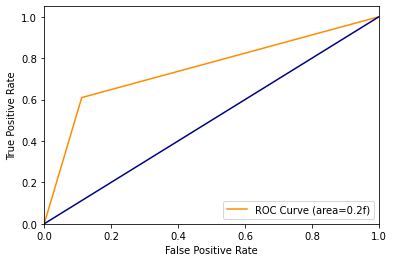

In [65]:
fpr, tpr, thresholds = roc_curve(predict3, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange', label='ROC Curve (area=0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [66]:
frc = RandomForestClassifier()
model4 = frc.fit(X_train, y_train)
predict4 = model4.predict(X_test)

print("Train Score", frc.score(X_train, y_train))
print("Test Score", frc.score(X_test, y_test))

Train Score 0.9999180999180999
Test Score 0.8594594594594595


In [67]:
print(confusion_matrix(y_test, predict4))

[[5799  423]
 [ 721 1197]]


In [68]:
print(classification_report(y_test, predict4))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6222
           1       0.74      0.62      0.68      1918

    accuracy                           0.86      8140
   macro avg       0.81      0.78      0.79      8140
weighted avg       0.85      0.86      0.86      8140



#### Cross Validation for Random Forest

In [69]:
from sklearn.model_selection import cross_val_score

rfc=accuracy_score(y_test,predict1)
for j in range(2,10):
    rfscore=cross_val_score(lr,X,y,cv=j)
    rf=rfscore.mean()
    print('At cv:-', j)
    print('Cross validation score is:-',rf*100)
    print('Accuracy_score is:-',rfc*100)
    print('\n')

At cv:- 2
Cross validation score is:- 83.78685503685503
Accuracy_score is:- 84.44717444717445


At cv:- 3
Cross validation score is:- 83.8237203244074
Accuracy_score is:- 84.44717444717445


At cv:- 4
Cross validation score is:- 83.77149877149877
Accuracy_score is:- 84.44717444717445


At cv:- 5
Cross validation score is:- 83.84213759213759
Accuracy_score is:- 84.44717444717445


At cv:- 6
Cross validation score is:- 83.78380233909382
Accuracy_score is:- 84.44717444717445


At cv:- 7
Cross validation score is:- 83.75310728923048
Accuracy_score is:- 84.44717444717445


At cv:- 8
Cross validation score is:- 83.78378378378379
Accuracy_score is:- 84.44717444717445


At cv:- 9
Cross validation score is:- 83.77458084810183
Accuracy_score is:- 84.44717444717445




In [70]:
rfscore_selected = cross_val_score(lr,X,y,cv=5).mean()
print("The cv score is:-", rfscore_selected,'\nThe accuracy score is:-',rfc)

The cv score is:- 0.8384213759213759 
The accuracy score is:- 0.8444717444717444


#### ROC AUC curve for Random Forest

In [71]:
dt_roc=roc_auc_score(y_test, predict4)
dt_roc

0.7780515101816723

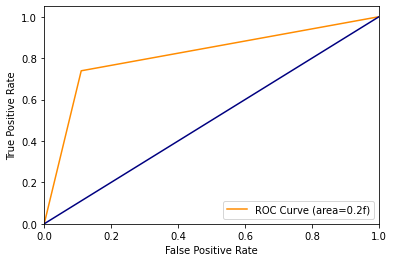

In [72]:
fpr, tpr, thresholds = roc_curve(predict4, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange', label='ROC Curve (area=0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Saving the best model

In [73]:
import joblib
joblib.dump(frc,'Census Income Project.pkl')

['Census Income Project.pkl']